In [74]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
cnx = mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="Poli@FSA1782")
cur = cnx.cursor()

In [76]:
if(cnx == None):
  print("There is no connection to database.")
else:
  print("Connection to database is created.")

Connection to database is created.


In [77]:
cur.execute('USE movies')

In [80]:
query = "SELECT title, buget, box_office FROM movie"
df = pd.read_sql(query, cnx)

C:\Users\alina\AppData\Local\Temp\ipykernel_10648\3664370007.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


In [88]:
buget_mediu = df['buget'].mean()
print(buget_mediu)

159376537.5


In [95]:
df['castig'] = df['box_office'] - df['buget']
print(df['castig'])

0    1.860000e+09
1    1.710000e+09
2    1.295000e+09
3    1.320000e+09
4    4.920000e+08
5    5.850000e+08
6   -7.000000e+07
7    7.700000e+03
Name: castig, dtype: float64


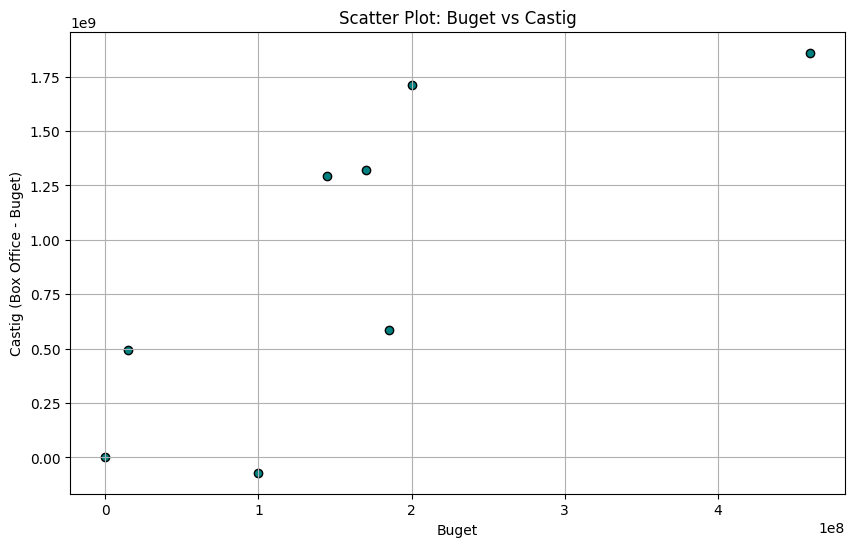

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(df["buget"], df["castig"], color='teal', edgecolors='black')
plt.title("Scatter Plot: Buget vs Castig")
plt.xlabel("Buget")
plt.ylabel("Castig (Box Office - Buget)")
plt.grid(True)
plt.savefig("scatter_buget_castig.png")
plt.show()

In [97]:
import pandas as pd
correlation = df[['buget','castig']].corr().iloc[0,1]
print(f"Corelatia Pearson intre buget si castig: {correlation:.2f}")

Corelatia Pearson intre buget si castig: 0.76


In [98]:
#0.76 reprezinta o corelatie puternica indicand faptul ca exista o legatura puternic pozitiva intre bugetul filmelor si profitul obtinut

In [99]:
query1 = """SELECT c.name_country, AVG(box_office - buget) AS castig_mediu FROM movie AS m
JOIN country AS c ON m.id_country = c.id_country
GROUP BY c.name_country
ORDER BY castig_mediu DESC
LIMIT 3;"""

df_country = pd.read_sql(query1, cnx)

C:\Users\alina\AppData\Local\Temp\ipykernel_10648\2876076513.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_country = pd.read_sql(query1, cnx)


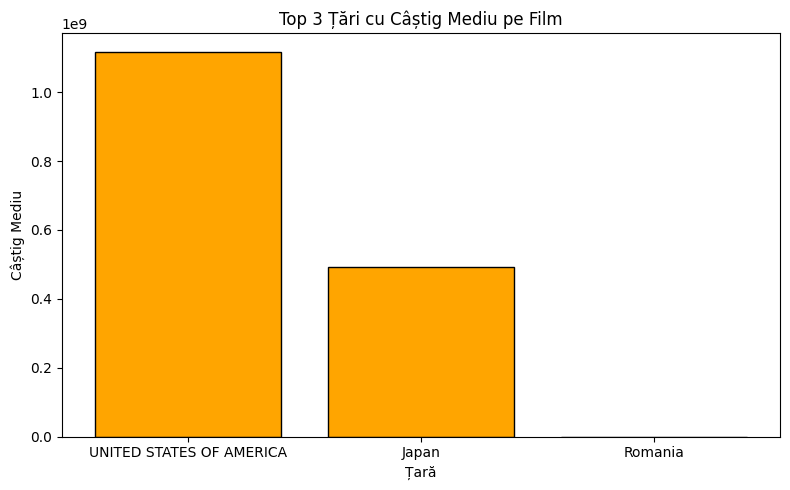

In [100]:
plt.figure(figsize=(8, 5))
plt.bar(df_country['name_country'], df_country['castig_mediu'], color='orange', edgecolor='black')
plt.title('Top 3 Țări cu Câștig Mediu pe Film')
plt.xlabel('Țară')
plt.ylabel('Câștig Mediu')
plt.tight_layout()
plt.savefig("top3_castig_pe_tara.png")
plt.show()